#Task 1 (20 points): Advanced Objective Function and Use Case

##1. Derive the objective function for Logistic Regression using Maximum Likelihood Estimation (MLE). Do some research on the MAP technique for Logistic Regression, include your research on how this technique is different from MLE (include citations).

https://dataminingbook.info/book_html/chap24/book.html

We are going to begin by assuming that this will be a binary logistic regression. By doing so we can thus use a Bernoulli distribution. Therefore, we will define that $P(Y=1|X=\bf x)=\pi(x)$, and $P(Y=0|X=\bf x)=1-\pi(x)$ where Y is the response variable, X is the independent variable, and x is the specific value of X in that intance.

We will also be defining the logistic method, or the method that will force a value ranging from negative infinity to positive infinity to become a value ranging from 0 to 1. There are many functions that accomplish such a task, but we will be using the sigmoid function specifically which can be defined as $\theta(z)=\frac{1}{1 + e^{-z}}$.

We must also remember the linear regression model, $f(\mathbf x) = \omega_0*x_0 + \omega_1*x_1 + ... + \omega_d*x_d = \mathbf w ^T \mathbf x$ where $\mathbf w$ is a true augmented weight vector. We cannot simply use this as is because $f(\mathbf x)$ can range from negative to positive infinity, where as the probability needed is only between 0 and 1.

Using the methods defined above, we can now create a proper model. $P(Y=1|X=\mathbf x) = \pi(x) = \theta(f(\mathbf x)) = \theta(\mathbf w ^T \mathbf x) = \frac{1}{1 + e^{-(\mathbf w ^T \mathbf x)}} = \frac{e^{\mathbf w ^T \mathbf x}}{1+e^{\mathbf w ^T \mathbf x}}$. In a similar fashion we know that $P(Y=0|X=\mathbf x) = \frac{1}{1+e^{\mathbf w ^T \mathbf x}}$. Therefore we can combine these two into a full model: $P(Y|X=\mathbf x) = \theta(\mathbf w ^T \mathbf x)^Y*\theta(-\mathbf w ^T \mathbf x)^{1-Y}$

With this foundation, we can finally start creating a likelihood equation. The likelihood of the observed responses is defined as:

$$L(\mathbf{w}) = P(Y|\mathbf{w}) = \prod_{i=1}^n \theta(\mathbf{w}^\top \mathbf{x}_i)^{y_i} \theta(-\mathbf{w}^\top \mathbf{x}_i)^{1-y_i}$$

And this is the formula that we will want to maximize. To make it simpler, we can take the natural log and get:

$$\ln(L(\mathbf{w})) = \sum_{i=1}^n \left( y_i \ln(\theta(\mathbf{w}^\top \mathbf{x}_i)) + (1-y_i) \ln(\theta(-\mathbf{w}^\top \mathbf{x}_i)) \right)$$

Thus, that is the MLE equation we will be going with for this assignment.

https://www.geeksforgeeks.org/data-science/mle-vs-map/

The key difference between MLE and MAP techniques are the MLE maximizes the likelihood while MAP maximizes the posterior probability. The result of this is that the MLE strategy is best fit to the data itself. It has no built in regularization and is therefore subject to extreme overfitting. MAP's inclusion of the prior reduces it's overfitting problem. Therefore, it is best to use MAP when you have a small or noisy data set, and best to use MLE when you have enough data to overcome overfitting concerns.

##2. Define a machine learning problem you wish to solve using Logistic Regression. Justify why logistic regression is the best choice and compare it briefly to another linear classification model (cite your work if this other technique was not covered in class)

I think an appropriate problem is cancer diagnoses. Specifially, whether tumors are malignant or benign. This is a task that requires a binary output, and that is where logistic regression thrives. We can compare it to perceptron, another linear classification model. While both methods will return the type of answer we need, and they both use a linear combination of inputs for a decision boundary, logistic regression is superior. The first reason is that it can work in more ambiguity. Perceptrons require a linearly seperable dataset to work, and this does often happen in medicine. Second, the probabilistic nature of logistic regression can be helpful to medical staff and gives more insite to the 0/1 output that the perceptron gives.

https://dataminingbook.info/book_html/chap25/book.html

https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

##3. Discuss how your dataset corresponds to the variables in your equations, highlighting any assumptions in your derivation from part 1.

The first and most obvious correspondence is the target varaible $y_i$ aligning with that of the diagnosis column. Rather than 0 and 1 in this case, the output will be M (Malignant) or B (Benign). The rest of the input information will be the independent variabe $x_i$. We will use thiese two components to solve for the augmented weight vector $\mathbf w$ and then input it to discover the classifications for each point.

Some assumptions I made in the is the the data is independent. The other big assumption in selecting MLE, as mentioned above, is that the dataset will be large enough to overcome the noise concerns. At over 500 samples, I believe this will be the case.

#Task 2 (20 points): Dataset and Advanced EDA

##1. Select a publicly available dataset (excluding commonly used datasets such as Titanic, Housing Prices or Iris). Provide a link to your dataset. Ensure the dataset has at least 10 features to allow for more complex analysis.

https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

##2. Perform Exploratory Data Analysis (EDA), addressing potential multicollinearity among features. Use Variance Inflation Factor (VIF) to identify highly correlated variables and demonstrate steps to handle them.


In [ ]:
# import the data
!pip install ucimlrepo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [ ]:
# this is the import code directly from the uci site

from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [ ]:
# address potential collinearity
# https://www.datacamp.com/tutorial/variance-inflation-factor

#  https://www.statsmodels.org/stable/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html
from statsmodels.stats.outliers_influence import variance_inflation_factor

# https://www.statsmodels.org/stable/generated/statsmodels.tools.tools.add_constant.html
from statsmodels.tools.tools import add_constant

Xvif = add_constant(X)

vifData = pd.DataFrame()
vifData["feature"] = X.columns
vifData["VIF"] = [variance_inflation_factor(Xvif.values, i) for i in range(1, Xvif.shape[1])]

print(vifData)

               feature          VIF
0              radius1  3806.115296
1             texture1    11.884048
2           perimeter1  3786.400419
3                area1   347.878657
4          smoothness1     8.194282
5         compactness1    50.505168
6           concavity1    70.767720
7      concave_points1    60.041733
8            symmetry1     4.220656
9   fractal_dimension1    15.756977
10             radius2    75.462027
11            texture2     4.205423
12          perimeter2    70.359695
13               area2    41.163091
14         smoothness2     4.027923
15        compactness2    15.366324
16          concavity2    15.694833
17     concave_points2    11.520796
18           symmetry2     5.175426
19  fractal_dimension2     9.717987
20             radius3   799.105946
21            texture3    18.569966
22          perimeter3   405.023336
23               area3   337.221924
24         smoothness3    10.923061
25        compactness3    36.982755
26          concavity3    31

We can see that there are several features with a VIF exceeding 10, which we will use as the benchmark of acceptability. We will therefore start removing features until all remaing are under 10 VIF.

In [ ]:
# create a copy for the reduction process
Xreduced = X.copy()

while True:
  Xvif = add_constant(Xreduced)
  vifList = [variance_inflation_factor(Xvif.values, i) for i in range(1, Xvif.shape[1])]
  maxVIF = max(vifList)

  if maxVIF > 10:
    maxVIFIndex = vifList.index(maxVIF)
    print(f"Dropping '{Xreduced.columns[maxVIFIndex]}")

    Xreduced = Xreduced.drop(Xreduced.columns[maxVIFIndex], axis=1)

  else:
    break

Dropping 'radius1
Dropping 'radius3
Dropping 'perimeter1
Dropping 'perimeter3
Dropping 'concavity1
Dropping 'radius2
Dropping 'compactness3
Dropping 'concave_points3
Dropping 'area1
Dropping 'compactness1
Dropping 'texture3
Dropping 'area2
Dropping 'concavity3


##3. Visualize the dataset's feature relationships, ensuring inclusion of at least two advanced visualization techniques (e.g., pair plots with KDE, heatmaps with clustering).

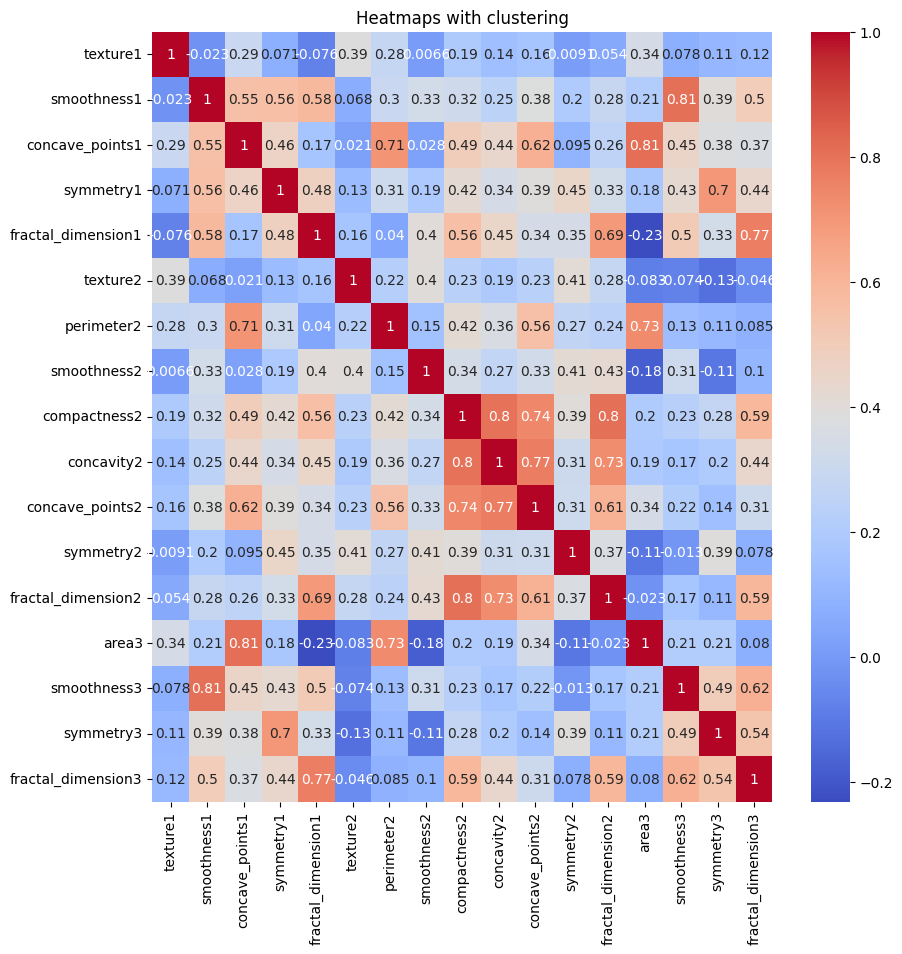

In [ ]:
# creating heatmaps with clusters
plotDataFrame = Xreduced.copy()
plotDataFrame["diagnosis"] = y

correlationMatrix = Xreduced.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(correlationMatrix, annot=True, cmap='coolwarm')
plt.title("Heatmaps with clustering")
plt.show()

We can see by the overwhelming majority of blue, the collinearity has been handled.

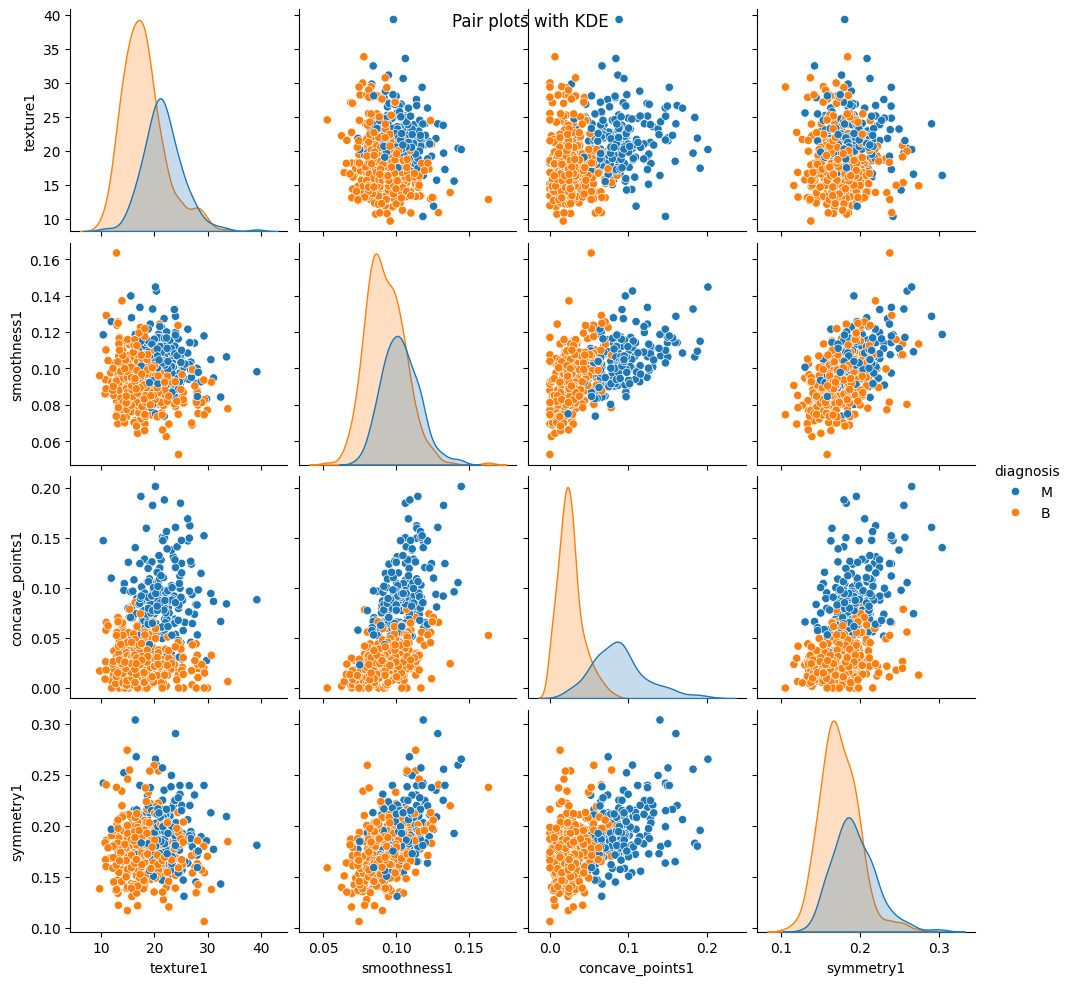

In [ ]:
# pair plots with KDE

# selecting a few features to keep the plot size manageble
featureSub = ['texture1', 'smoothness1', 'concave_points1', 'symmetry1', 'diagnosis']

sns.pairplot(plotDataFrame[featureSub], hue='diagnosis', diag_kind='kde')
plt.suptitle("Pair plots with KDE")
plt.show()

We can again see the overlap in most of these cases are not too extreme

#Task 3 (20 points): Logistic Regression Implementation

##1. Implement Logistic Regression from scratch, including the vectorized implementation of cost function and gradient descent.

Before any code, I wanted to prepare the data. That included changing the y from categorical to numerical. Afterwards, I scaled then augmented the features. I also split them into the requisite train, validation, test sets

In [ ]:
yNumeric = np.where(y == 'M', 1, 0).reshape(-1, 1)

Xtrain, Xver, ytrain, yver = train_test_split(Xreduced, yNumeric, test_size=0.3, random_state=42)

Xval, Xtest, yval, ytest = train_test_split(Xver, yver, test_size=0.5, random_state=42)


scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xval = scaler.transform(Xval)
Xtest = scaler.transform(Xtest)

Xtrain = np.hstack((np.ones((Xtrain.shape[0], 1)), Xtrain))
Xval   = np.hstack((np.ones((Xval.shape[0], 1)), Xval))
Xtest  = np.hstack((np.ones((Xtest.shape[0], 1)), Xtest))

XtrainTensor = torch.FloatTensor(Xtrain)
ytrainTensor = torch.FloatTensor(ytrain)
XvalTensor = torch.FloatTensor(Xval)
yvalTensor = torch.FloatTensor(yval)
XTestTensor = torch.FloatTensor(Xtest)
yTestTensor = torch.FloatTensor(ytest)

These are all the methods for vanilla gradient descent. I had to do this in Data Mining, so I took a lot of my code from that.

In [ ]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [ ]:
def logLoss(X, y, w):
    n = len(y)
    # compute the linear combination
    z = np.dot(X, w)
    yhat = sigmoid(z)
    # include a small constant to avoid log(0)
    epsilon = 1e-15
    # compute the log loss cost
    loss = -(1/n) * np.sum(y * np.log(yhat + epsilon) + (1 - y) * np.log(1 - yhat + epsilon))

    return loss

In [ ]:
def gradientDescent(X, y, w, alpha, iters):
    n = len(y)
    lossRecord = []

    for i in range(iters):
        # compute the linear combination
        z = np.dot(X, w)
        yhat = sigmoid(z)

        error = yhat - y
        gradient = np.dot(X.T, error) / n

        w = w - alpha * gradient
        loss = logLoss(X, y, w)
        lossRecord.append(loss)

    return w, lossRecord

In [ ]:
initialW = np.zeros((Xtrain.shape[1], 1))
alpha = 0.01
iters = 1000

w, lossRecord = gradientDescent(Xtrain, ytrain, initialW, alpha, iters)

##2. Implement and compare the three gradient descent variants (e.g., batch gradient descent, stochastic gradient descent, and mini-batch gradient descent). Explain their convergence properties with respect to your cost function.

Again, these were steps I had to do in Data Mining, so there was a lot of carry over

In [ ]:
def batchGradientDescent(X, y, w, alpha, iters):
    n = len(y)
    lossRecord = []

    for i in range(iters):
        # compute the linear combination
        z = np.dot(X, w)
        yhat = sigmoid(z)

        error = yhat - y
        gradient = np.dot(X.T, error) / n

        w = w - alpha * gradient
        loss = logLoss(X, y, w)
        lossRecord.append(loss)

    return w, lossRecord

In [ ]:
def stochasticGradientDescent(X, y, w, alpha, iters):
    n = len(y)
    lossRecord = []

    for i in range(iters):
        for j in range(n):
            xj = X[j:j+1]
            yj = y[j:j+1]
            # compute the linear combination
            z = np.dot(xj, w)
            yhat = sigmoid(z)

            error = yhat - yj
            gradient = (xj.T @ error)
            w = w - alpha * gradient

        loss = logLoss(X, y, w)
        lossRecord.append(loss)

    return w, lossRecord

In [ ]:
def miniBatchGradientDescent(X, y, w, alpha, iters, batchSize):
    n = len(y)
    lossRecord = []
    for i in range(iters):
        indices = np.random.permutation(n)
        Xshuff = X[indices]
        yshuff = y[indices]

        for i in range(0, n, batchSize):
            Xb = Xshuff[i:i+batchSize]
            yb = yshuff[i:i+batchSize]

            if len(yb) == 0:
                continue

            z = Xb @ w
            yhat = sigmoid(z)
            error = yhat - yb
            gradient = (Xb.T @ error) / len(yb)
            w -= alpha * gradient

        loss = logLoss(X, y, w)
        lossRecord.append(loss)

    return w, lossRecord

In [ ]:
# find the result for batch gradient descent
batchW = np.zeros((Xtrain.shape[1], 1))
batchAlpha = 0.01
batchIters = 1000

batchW, batchLossRecord = batchGradientDescent(Xtrain, ytrain, batchW, batchAlpha, batchIters)
loss = logLoss(Xval, yval, batchW)
print(f"Batch Gradient Descent Loss: {loss}")

# find the result for stochastic gradient descent
stochasticW = np.zeros((Xtrain.shape[1], 1))
stochasticAlpha = 0.01
stochasticIters = 1000

stochasticW, stochasticLossRecord = stochasticGradientDescent(Xtrain, ytrain, stochasticW, stochasticAlpha, stochasticIters)
loss = logLoss(Xval, yval, stochasticW)
print(f"Stochastic Gradient Descent Loss: {loss}")

# find the result for mini-batch gradient descent
miniBatchW = np.zeros((Xtrain.shape[1], 1))
miniBatchAlpha = 0.01
miniBatchIters = 1000

miniBatchW, miniBatchLossRecord = miniBatchGradientDescent(Xtrain, ytrain, miniBatchW, miniBatchAlpha, miniBatchIters, 32)
loss = logLoss(Xval, yval, miniBatchW)
print(f"Mini-Batch Gradient Descent Loss: {loss}")

Batch Gradient Descent Loss: 0.15376310020512537
Stochastic Gradient Descent Loss: 0.16600320792758053
Mini-Batch Gradient Descent Loss: 0.08651467083249428


We can see that Mini-Batch achieves the smallest loss, followed by SGD, which is very closely followed by BGD. This is expected as BGD is going to descend the slowest, resulting in a higher loss in the end. SGD is much quicker, but the variance in its updates lead to the higher loss. Finally, MBGD balances these rather well, and hence, is able to achieve the best loss results.

#Task 4 (40 points): Optimization Techniques and Advanced Comparison

##1. Implement or use packages to incorporate any three optimization algorithms (e.g., Momentum, RMSProp, Adam). Compare their performance with the vanilla stochastic gradient descent implementation from Task 3.

In [ ]:
# setting up a basic model to use with the optimizers
model = nn.Sequential(
    nn.Linear(XtrainTensor.shape[1], 1),
    nn.Sigmoid()
)

lossFunc = nn.BCELoss()

optimizerMomentum = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
optimizerRMSProp = optim.RMSprop(model.parameters(), lr=0.01, alpha=0.9)
optimizerAdam = optim.Adam(model.parameters(), lr=0.01, betas=(0.9, 0.999))

In [ ]:
# creating a simple training method for future use
def trainModel(model, optimizer, epochs):
    model.train()
    losses = []
    for epoch in range(epochs):
        yhat = model(XtrainTensor)
        loss = lossFunc(yhat, ytrainTensor)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.item())

    return model, losses

momentumModel, momentumLosses = trainModel(model, optimizerMomentum, 1000)
rmspropModel, rmspropLosses = trainModel(model, optimizerRMSProp, 1000)
adamModel, adamLosses = trainModel(model, optimizerAdam, 1000)

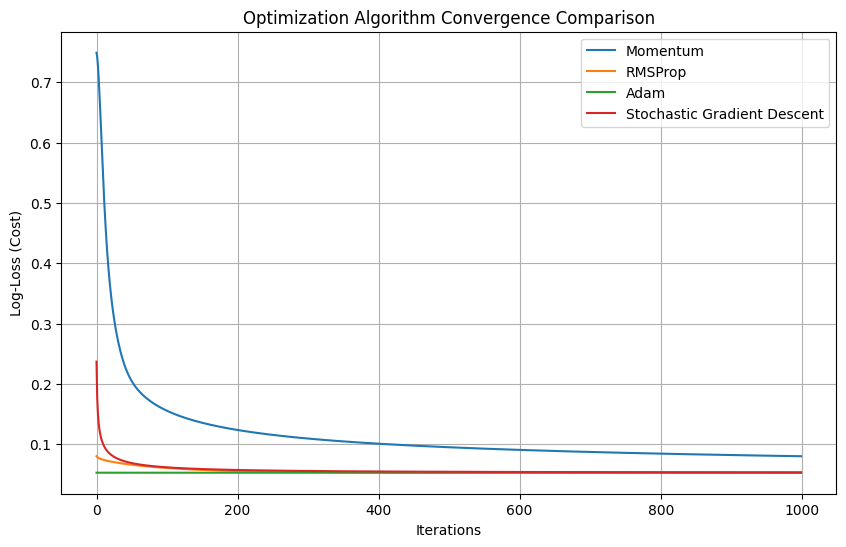

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(momentumLosses, label='Momentum')
plt.plot(rmspropLosses, label='RMSProp')
plt.plot(adamLosses, label='Adam')
plt.plot(stochasticLossRecord, label='Stochastic Gradient Descent')


plt.title("Optimization Algorithm Convergence Comparison")
plt.xlabel("Iterations")
plt.ylabel("Log-Loss (Cost)")
plt.legend()
plt.grid(True)
plt.show()

##2. Define and use multiple evaluation metrics (e.g., precision, recall, F1 score) to analyze and interpret results for each algorithm.


For this step, I will be using the suggested evaluation metrics of precision, recall, and F1 score. Precision is the ratio of true positives to all of the values predicted as positives. Recall is the ratio of true positives to all of the values that should be positive (true positives and false negatives). Finally, the F1 score combines these values and is 2 times the product of Precision and Recall divided by their sum.

In our case, the most important metric is recall. This is because when analyzing tumors, we want to make sure that we are identifying all of the cases where people would need help. Having a false positive is inconvinient, and likely scary, but it will be sorted out later. If you have a false negative result, that can be fatal. Recall is our best measure on the rate at which we are getting false negatives.

In [ ]:
# a simple evaluation model for the optimizers
def evaluateModel(model, X, y):
    model.eval()
    with torch.no_grad():
        yhat = model(X)
        yhat = (yhat > 0.5).float()

    precision = precision_score(y, yhat)
    recall = recall_score(y, yhat)
    f1 = f1_score(y, yhat)

    return precision, recall, f1

In [ ]:
# calculate metrics for each advance optimizer
momentumPrecision, momentumRecall, momentumF1 = evaluateModel(momentumModel, XTestTensor, yTestTensor)
rmspropPrecision, rmspropRecall, rmspropF1 = evaluateModel(rmspropModel, XTestTensor, yTestTensor)
adamPrecision, adamRecall, adamF1 = evaluateModel(adamModel, XTestTensor, yTestTensor)

print("Momentum Metrics:")
print(f"Precision: {momentumPrecision}")
print(f"Recall: {momentumRecall}")
print(f"F1 Score: {momentumF1}")

print("\nRMSProp Metrics:")
print(f"Precision: {rmspropPrecision}")
print(f"Recall: {rmspropRecall}")
print(f"F1 Score: {rmspropF1}")

print("\nAdam Metrics:")
print(f"Precision: {adamPrecision}")
print(f"Recall: {adamRecall}")
print(f"F1 Score: {adamF1}")

Momentum Metrics:
Precision: 0.9285714285714286
Recall: 1.0
F1 Score: 0.9629629629629629

RMSProp Metrics:
Precision: 0.9285714285714286
Recall: 1.0
F1 Score: 0.9629629629629629

Adam Metrics:
Precision: 0.9285714285714286
Recall: 1.0
F1 Score: 0.9629629629629629


In [ ]:
# calculate metrics for SGD
SGDYhat = sigmoid(np.dot(Xtest, stochasticW))
SGDYhat = (SGDYhat > 0.5).astype(int)

SGDPrecision = precision_score(ytest, SGDYhat)
SGDRecall = recall_score(ytest, SGDYhat)
SGDFF1 = f1_score(ytest, SGDYhat)

print("SGD Metrics:")
print(f"Precision: {SGDPrecision}")
print(f"Recall: {SGDRecall}")
print(f"F1 Score: {SGDFF1}")

SGD Metrics:
Precision: 0.9285714285714286
Recall: 1.0
F1 Score: 0.9629629629629629


##3. Perform a hyperparameter tuning process (manual or automated using grid search/random search) for each optimization algorithm and assess its impact on performance. If you have to do some research for these techniques, please cite your sources.

In [ ]:
# this is a grid search to optimize the learning rate. This will allow me to find the optimal eta for each of the optimizers and uses my prior training and evaluation methods
def hyperparameterTuning(Xtrain, ytrain, Xval, yval, etas=[0.1, 0.01, 0.001]):
    optimizers = {
        'Momentum': lambda params, lr: torch.optim.SGD(params, lr=lr, momentum=0.9),
        'RMSProp': torch.optim.RMSprop,
        'Adam': torch.optim.Adam
    }
    results = []

    for optimizerName, optimizerClass in optimizers.items():
        for eta in etas:
            model = nn.Sequential(
                nn.Linear(Xtrain.shape[1], 1),
                nn.Sigmoid()
            )
            tempOptimizer = optimizerClass(model.parameters(), lr=eta)

            trainedModel, _ = trainModel(model, tempOptimizer, 1000)

            precision, recall, f1 = evaluateModel(trainedModel, Xval, yval)

            results.append((optimizerName, eta, precision, recall, f1))

    return pd.DataFrame(results, columns=['Optimizer', 'Learning Rate', 'Precision', 'Recall', 'F1 Score'])

In [ ]:
results = hyperparameterTuning(XtrainTensor, ytrainTensor, XvalTensor, yvalTensor)

print(results)

  Optimizer  Learning Rate  Precision    Recall  F1 Score
0  Momentum          0.100   0.944444  0.918919  0.931507
1  Momentum          0.010   0.972222  0.945946  0.958904
2  Momentum          0.001   0.971429  0.918919  0.944444
3   RMSProp          0.100   0.918919  0.918919  0.918919
4   RMSProp          0.010   0.918919  0.918919  0.918919
5   RMSProp          0.001   0.972222  0.945946  0.958904
6      Adam          0.100   0.918919  0.918919  0.918919
7      Adam          0.010   0.972222  0.945946  0.958904
8      Adam          0.001   0.944444  0.918919  0.931507


In [ ]:
# using the results we got above, it's time to find the final set of f1 scores using the test data

bestParams = results.loc[results.groupby('Optimizer')['F1 Score'].idxmax()]
finalTestResults = []

optimizers = {
    'Momentum': lambda params, lr: torch.optim.SGD(params, lr=lr, momentum=0.9),
    'RMSProp': torch.optim.RMSprop,
    'Adam': torch.optim.Adam
}

for index, row in bestParams.iterrows():
    optName = row['Optimizer']
    bestEta = row['Learning Rate']

    torch.manual_seed(42)
    finalModel = nn.Sequential(
        nn.Linear(Xtrain.shape[1], 1),
        nn.Sigmoid()
    )
    optimizerClass = optimizers[optName]
    finalOptimizer = optimizerClass(finalModel.parameters(), lr=bestEta)

    finalModel, _ = trainModel(finalModel, finalOptimizer, 1000)
    precision, recall, f1 = evaluateModel(finalModel, XTestTensor, yTestTensor)

    finalTestResults.append((optName, bestEta, precision, recall, f1))

finalTestResults = pd.DataFrame(finalTestResults, columns=['Optimizer', 'Learning Rate', 'Precision', 'Recall', 'F1 Score'])

print(finalTestResults)

  Optimizer  Learning Rate  Precision  Recall  F1 Score
0      Adam          0.010   0.928571     1.0  0.962963
1  Momentum          0.010   1.000000     1.0  1.000000
2   RMSProp          0.001   0.962963     1.0  0.981132


##4. Conclude by discussing the practical trade-offs of the algorithms, including computational complexity, interpretability, and suitability for large-scale datasets.

In terms of trade off, we can see that the optimized algorithms performed extrodinarily well. The each achieved a recall score of 1, which we had determined was our most important metric. Additionally, though it is a small dataset, the optimized Momentum optimizer achieving an F1 score of 1 is also extrodinarily impressive.

In terms of complexity, the optimizers are going to be far worse than the vanilla SGD. They are going to require more memory, and it is harder to understand exactly what they are doing for a novice in the ML field. However, these costs are worth it. The performance gains that they afforded are definetly worth the price of complexity. That is especially the case when considering the stakes, in this situation, human life.

Though they sophisticated, the methods used here are not neccessarily a "black box". This, again, is great for the medical field. People like to understand how decisions are being made and they still can to a certain extent with the methods being used.

With the optimizers, these algorithms are going to be very suitable when it comes to larger data sets. They ran extremely quickly on this smaller dataset and are built to scale well.

The bottom line with all of this is that the methods used were appropriate for the field and nature of the dataset. They worked exceedingly well, escpecially considering the size of the data set and got the desired result of a recall=1. I think they will scale really well to larger datasets and the complexity of Adam and Momentum will be worth the cost of the lives they would save.